# Autoencoder

This is an anomaly detection method in which we train an Autoencoder to reconstruct our data. We consider outliers to be data points that have a high reconstruction error. This method leverages a neural network architecture to capture non-linear relationships in the data. However, it may be computationally expensive to choose appropriate parameters/hyperparameters and train the model. We use a 6 layer network and train for 100 epochs. We measure the reconstruction error using mean squared error and find that a threshold of 7.5e-5 works best.

In [ ]:
# import necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MSE

In [ ]:
data = pd.read_csv('drive/My Drive/intc_data.csv')

In [ ]:
# convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], utc=True).dt.to_period('M').astype(str)
print(data['Date'])

0       1985-01
1       1985-01
2       1985-01
3       1985-01
4       1985-01
         ...   
7559    2014-12
7560    2014-12
7561    2014-12
7562    2014-12
7563    2014-12
Name: Date, Length: 7564, dtype: object


<ipython-input-14-93c936101c8a>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['Date'] = pd.to_datetime(data['Date'], utc=True).dt.to_period('M').astype(str)


In [ ]:
# Indicators to consider
indicators = ['Volume', 'SMA_50', 'RSI', 'MACD', 'Upper_BB', 'Lower_BB']
# Normalize the features
scaler = MinMaxScaler()
data[indicators] = scaler.fit_transform(data[indicators])

In [ ]:
features = data[indicators]

# Define the autoencoder architecture
autoencoder = Sequential([
    Dense(64, activation='relu', input_dim=features.shape[1]),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(features.shape[1], activation='linear')
])

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(features, features, epochs=100, batch_size=32)

# Predict reconstructions
reconstructions = autoencoder.predict(features)

# Calculate reconstruction error
errors = MSE(features, reconstructions)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0313
Epoch 2/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.0176e-04
Epoch 3/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6190e-04
Epoch 4/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.6833e-05
Epoch 5/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.7723e-05
Epoch 6/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.2090e-05
Epoch 7/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5014e-05
Epoch 8/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.6929e-05
Epoch 9/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6712e-05
Epoch 10/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5821e-05
Epoch 11/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9241e-05
Epoch 12/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7299e-05
Epoch 13/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4968e-05
Epoch 14/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.

In [ ]:
# Identify outliers based on a threshold
threshold = 7.5e-5
errors_np = errors.numpy()

# Create a Pandas Series with the same index as 'data'
errors_series = pd.Series(errors_np, index=data.index)

# Identify outliers
outliers = data[errors_series > threshold]

In [ ]:
print(outliers.info())

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 983 to 3989
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          58 non-null     object 
 1   Open          58 non-null     float64
 2   High          58 non-null     float64
 3   Low           58 non-null     float64
 4   Close         58 non-null     float64
 5   Volume        58 non-null     float64
 6   Dividends     58 non-null     float64
 7   Stock Splits  58 non-null     float64
 8   Return        58 non-null     float64
 9   SMA_50        58 non-null     float64
 10  EMA_20        58 non-null     float64
 11  WMA_30        58 non-null     float64
 12  RSI           58 non-null     float64
 13  Upper_BB      58 non-null     float64
 14  Lower_BB      58 non-null     float64
 15  MACD          58 non-null     float64
 16  Signal_Line   58 non-null     float64
dtypes: float64(16), object(1)
memory usage: 8.2+ KB
None


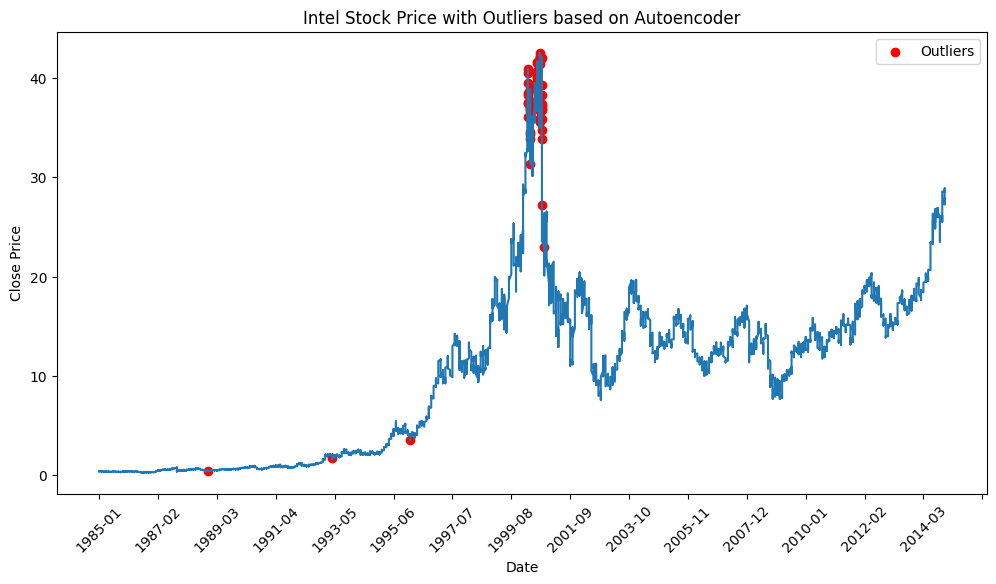

In [ ]:
# Plot closing price
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'])
plt.scatter(outliers['Date'], outliers['Close'], color='red', label='Outliers')
plt.title('Intel Stock Price with Outliers based on Autoencoder')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(25))
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

This method primarily identifies data points that surround the Dot-Com Crash. Considering the non-linear relationships within the data seems to have yielded the most promising results.